# Deterministic description

This notebook is an interactive version of the paper's code base.

Feel free to explore the system's evolution for different (modifiable) parameter values.

![Pipeline](Figure1.png "Pipeline")



In [78]:
using DrWatson
@quickactivate "ChaosNoiseEGT"

include(srcdir("PayoffMatrix.jl"))
include(srcdir("DeterministicSRC.jl"))
include(srcdir("Graphs.jl"))
include(srcdir("Quantifiers.jl"))

using DynamicalSystems
using PyPlot

## 1. Input

### *Fixed input*

#### Payoff matrix
Payoff matrix of the ACT/Skyrms attractor

In [2]:
display(payoff_matrix)

4×4 Matrix{Float64}:
  0.0   -0.6  0.0   1.0
  1.0    0.0  0.0  -0.5
 -1.05  -0.2  0.0   1.75
  0.5   -0.1  0.1   0.0

#### Initial conditions
The ACT/Skyrms' attractor can be properly seen starting with initial conditions close to the center of the simplex.
Therefore, for a robust analysis of the attractor we recommend the following initial conditions:
`ini_con = [0.25,0.25,0.25,0.25]`

_Note: the sum of all initial conditions should be equal to 1. (The quantities represent frequencies/relative amounts, therefore they should be normalised.)_



In [3]:
ini_con = [0.25,0.25,0.25,0.25]
#Nearby initial condition
#ini_con = [0.25,0.25,0.249,0.251]

4-element Vector{Float64}:
 0.25
 0.25
 0.25
 0.25

## 2. Update rule

### Generalised pairwise comparison process
Set of ordinary differential equations (ODEs) of the deterministic description:

$$\dot{x_i} = \sum_{j=1}^{d} x_ix_j\tanh\left[\frac{\beta}{2}(f_i(\vec{x}) - f_j(\vec{x}))\right] \hspace{5mm} i=1,..,d$$

The input (fixed and modifiable) are already included in `ODE_sys`.

In [4]:
ODE_sys = ContinuousDynamicalSystem(replicator_equation!, ini_con, diffeq=(abstol = 1.0e-9,reltol = 1.0e-9))

4-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  replicator_equation!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-9, reltol = 1.0e-9)
 parameters:    SciMLBase.NullParameters()
 time:          0.0
 state:         [0.25, 0.25, 0.25, 0.25]


## 3. Data
Solution of the ODE system for the stated parameter(s) and initial condition values.

In [26]:
Data, t = trajectory(ODE_sys, 10000)
Data

4-dimensional StateSpaceSet{Float64} with 100001 points
 0.25      0.25      0.25      0.25
 0.249532  0.250149  0.250165  0.250153
 0.249067  0.250285  0.250348  0.2503
 0.248603  0.250406  0.250549  0.250441
 0.248142  0.250514  0.250767  0.250577
 0.247683  0.250609  0.251002  0.250706
 0.247226  0.25069   0.251255  0.25083
 0.246771  0.250757  0.251524  0.250948
 0.246319  0.250811  0.251809  0.25106
 0.245869  0.250852  0.252111  0.251167
 ⋮                             
 0.226465  0.347412  0.14175   0.284373
 0.225925  0.346865  0.143041  0.284168
 0.225389  0.346302  0.144349  0.28396
 0.224857  0.345723  0.145672  0.283749
 0.224327  0.345129  0.147011  0.283533
 0.2238    0.344519  0.148366  0.283315
 0.223277  0.343894  0.149736  0.283093
 0.222756  0.343254  0.151123  0.282867
 0.222239  0.342598  0.152525  0.282638

## 4.1 Graph
* Ternary plot

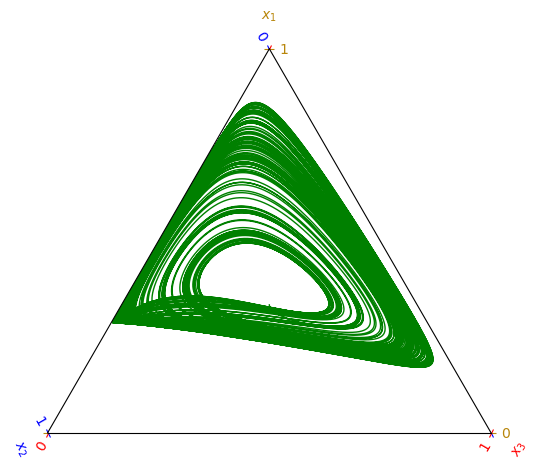

In [27]:
plt.clf()
ternary_plot(Data[:,1],Data[:,2],Data[:,3])
gcf()

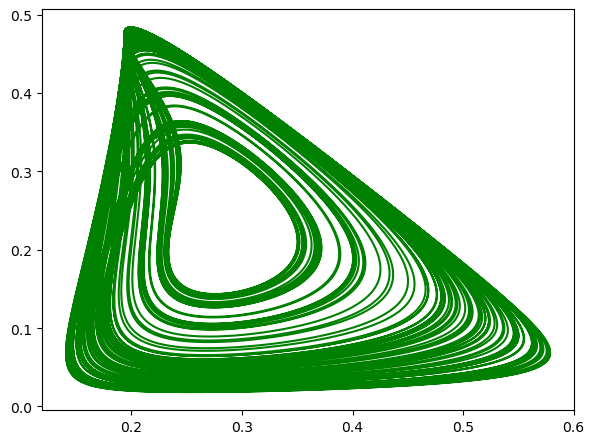

In [81]:
plt.clf()
plot(Data[20000:end,1],Data[20000:end,2],color="g")
gcf()

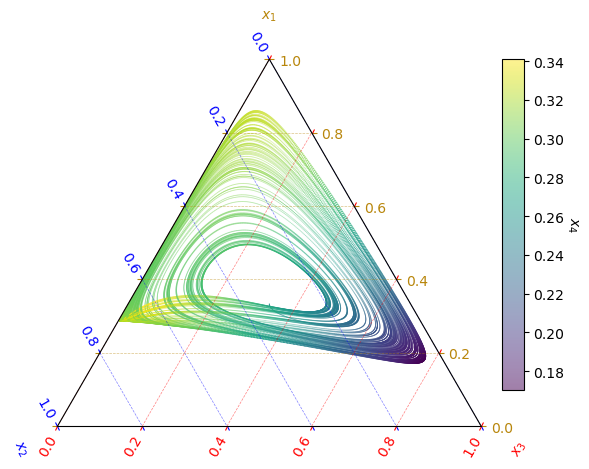

In [58]:
plt.clf()
ternary_plot_depth(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
plt.savefig(plotsdir("Deterministic/RepDyn_TernaryDepth.pdf"))
gcf()

* Time series
    - Full time series

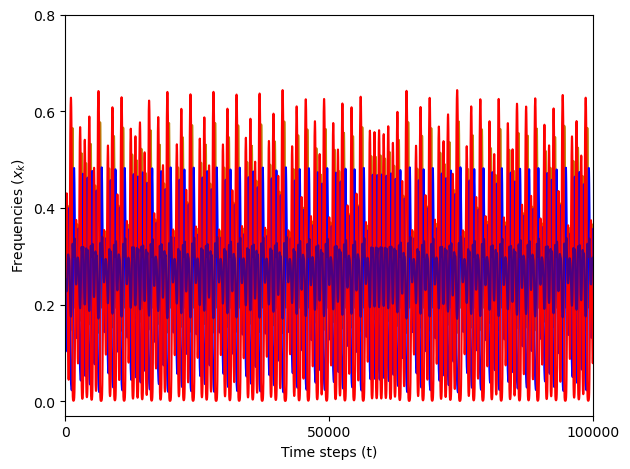

In [79]:
plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
gcf()

- Adjust the x axis freely using `xmin_value` and `xmax_value`. (Both values should be integers!)

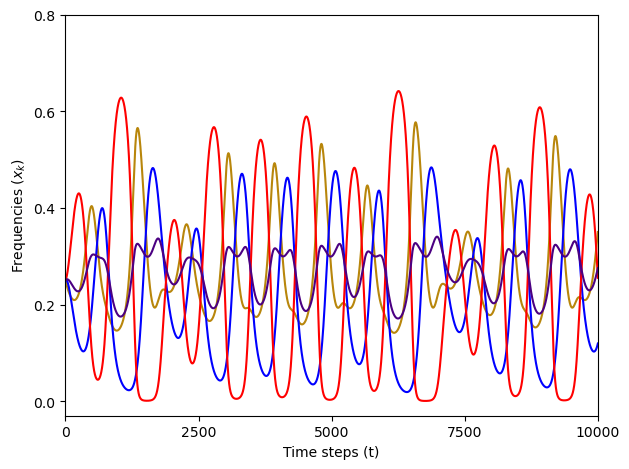

In [80]:
#xmin_value and xmax_value must be integers!
#xmin_value = 70000
#xmax_value = 80000
xmin_value = 0
xmax_value = 10000


plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4];xmin=xmin_value, xmax=xmax_value)
plt.savefig(plotsdir("Deterministic/RepDyn_TS.pdf"))
gcf()

## 4.2 Quantify
* Fractal dimension

*Note: The fractal dimension is a quantifier that takes long to calculate*

In [12]:
FD_info = fractal_dimension(Data)[1]
println("The fractal dimension of the system is: "*string(FD_info))

The fractal dimension of the system is: 1.03131


* Permutation entropy

In [13]:
PE = permutation_entropy(Data)
println("The normalised permutation entropy of the system is: "*string(PE))

The normalised permutation entropy of the system is: 0.15718770492385006


* Standard deviation

In [41]:
STD_info = standard_deviation(Data)
for i in 1:4
    println("The standard deviation of x"*string(i)*" is: "*string(STD_info[i]))
end
print("Average standard deviation is: "*string(mean(STD_info)))

The standard deviation of x1 is: 0.013
The standard deviation of x2 is: 0.018
The standard deviation of x3 is: 0.03
The standard deviation of x4 is: 0.007
Average standard deviation is: 0.017

* Lyapunov exponents

*Note: The Lyapunov spectrum is a quantifier that takes long to calculate*

In [37]:
lyapunov_spectrum = lyapunovspectrum(ODE_sys, 100000, 4; Ttr = 100)
println("Lyapunov spectrum")
println(lyapunov_spectrum)
for i in lyapunov_spectrum
    if i > 0
        println("At least one positive Lyapunov exponent.")
        break
    else
        println("No positive Lyapunov exponents.")
    end
end


Lyapunov spectrum
[3.4394582782060115e-5, -5.3273279248594256e-5, -0.00047358061852352355, -0.20870605827452227]
At least one positive Lyapunov exponent.


In [37]:
LE = lyapunov(ODE_sys, 10000; Ttr = 40000)
println(LE)

4.7144532991849794e-5


* Fourier spectrum

To change the range of the x-axis, modify `xlim_vals`.

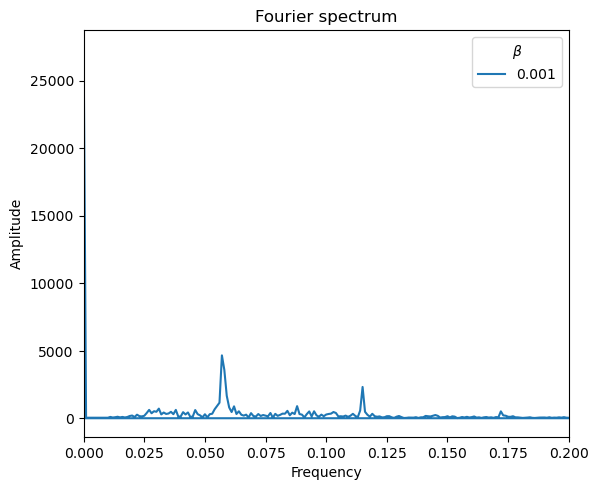

In [13]:
xlim_vals=[0,0.2]

#Fourier spectrum
freq,amp=fourier_spectrum(Data)

#Plot
plt.clf()
plt.plot(freq, amp,label=string(B))

#Plot aesthetics
plt.xlim((xlim_vals[1],xlim_vals[2]))
plt.legend(loc="best",title=L"\beta")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Fourier spectrum")
gcf()

* Lempel-Ziv complexity measure

In [14]:
LZ_info = lempelzivdata(Data)
for i in 1:4
    println("The Lempel-Ziv measure of x"*string(i)*" is: "*string(LZ_info[i]))
end
print("Average Lempel-Ziv measure is: "*string(mean(LZ_info)))

The Lempel-Ziv measure of x1 is: 701.0
The Lempel-Ziv measure of x2 is: 704.0
The Lempel-Ziv measure of x3 is: 708.0
The Lempel-Ziv measure of x4 is: 705.0
Average Lempel-Ziv measure is: 704.5